In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa-world-cup-2022-complete-dataset/Fifa_world_cup_matches.csv


In [4]:
df = pd.read_csv("/kaggle/input/fifa-world-cup-2022-complete-dataset/Fifa_world_cup_matches.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 88 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   team1                                                  64 non-null     object
 1   team2                                                  64 non-null     object
 2   possession team1                                       64 non-null     object
 3   possession team2                                       64 non-null     object
 4   possession in contest                                  64 non-null     object
 5   number of goals team1                                  64 non-null     int64 
 6   number of goals team2                                  64 non-null     int64 
 7   date                                                   64 non-null     object
 8   hour                                                   64 non-

In [5]:
df.describe

<bound method NDFrame.describe of             team1         team2 possession team1 possession team2  \
0           QATAR       ECUADOR              42%              50%   
1         ENGLAND          IRAN              72%              19%   
2         SENEGAL   NETHERLANDS              44%              45%   
3   UNITED STATES         WALES              51%              39%   
4       ARGENTINA  SAUDI ARABIA              64%              24%   
..            ...           ...              ...              ...   
59        ENGLAND        FRANCE              54%              36%   
60      ARGENTINA       CROATIA              34%              54%   
61         FRANCE       MOROCCO              34%              55%   
62        CROATIA       MOROCCO              45%              45%   
63      ARGENTINA        FRANCE              46%              40%   

   possession in contest  number of goals team1  number of goals team2  \
0                     8%                      0                

In [6]:
df.isnull()

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
60,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
61,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
62,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.head()

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361


In [8]:
df['hour'] = df['hour'].str.replace(' ', '', regex=False)  # "17 : 00" → "17:00"
df['datetime'] = pd.to_datetime(
    df['date'] + ' ' + df['hour'], 
    format='%d %b %Y %H:%M'
)
print(df[['date','hour','datetime']].head())

          date   hour            datetime
0  20 NOV 2022  17:00 2022-11-20 17:00:00
1  21 NOV 2022  14:00 2022-11-21 14:00:00
2  21 NOV 2022  17:00 2022-11-21 17:00:00
3  21 NOV 2022  20:00 2022-11-21 20:00:00
4  22 NOV 2022  11:00 2022-11-22 11:00:00


In [11]:
df['total_goals'] = df['number of goals team1'] + df['number of goals team2']
print('Avg Goal Per-Match=', df['total_goals'].mean())

Avg Goal Per-Match 2.6875


In [11]:
print(df['possession team1'].head())
print(df['possession team1'].dtype)

0    42.0
1    72.0
2    44.0
3    51.0
4    64.0
Name: possession team1, dtype: float64
float64


In [13]:
df['possession team1'] = df['possession team1'].astype(str).str.replace('%', '').astype(float)
df['possession team2'] = df['possession team2'].astype(str).str.replace('%', '').astype(float)
df['possession in contest'] = df['possession in contest'].astype(str).str.replace('%', '').astype(float)
df['possession in contest'].head()

0     8.0
1     9.0
2    11.0
3    10.0
4    12.0
Name: possession in contest, dtype: float64

In [14]:
print("Goals scored team1:\n", df['number of goals team1'].describe())
print("\nGoals scored team2:\n", df['number of goals team2'].describe())

summary = pd.DataFrame({
    'Goals Scored Team1': df['number of goals team1'],
    'Goals Conceded Team1': df['conceded team1'],
    'Goals Scored Team2': df['number of goals team2'],
    'Goals Conceded Team2': df['conceded team2']
}).describe()

print(summary)

Goals scored team1:
 count    64.000000
mean      1.578125
std       1.551289
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       7.000000
Name: number of goals team1, dtype: float64

Goals scored team2:
 count    64.000000
mean      1.109375
std       1.055856
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       4.000000
Name: number of goals team2, dtype: float64
       Goals Scored Team1  Goals Conceded Team1  Goals Scored Team2  \
count           64.000000             64.000000           64.000000   
mean             1.578125              1.109375            1.109375   
std              1.551289              1.055856            1.055856   
min              0.000000              0.000000            0.000000   
25%              0.000000              0.000000            0.000000   
50%              1.000000              1.000000            1.000000   
75%              2.000000              2.000000            2.000000 

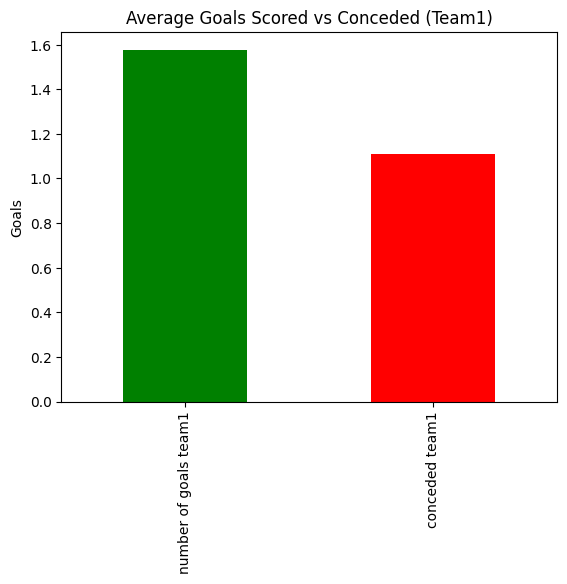

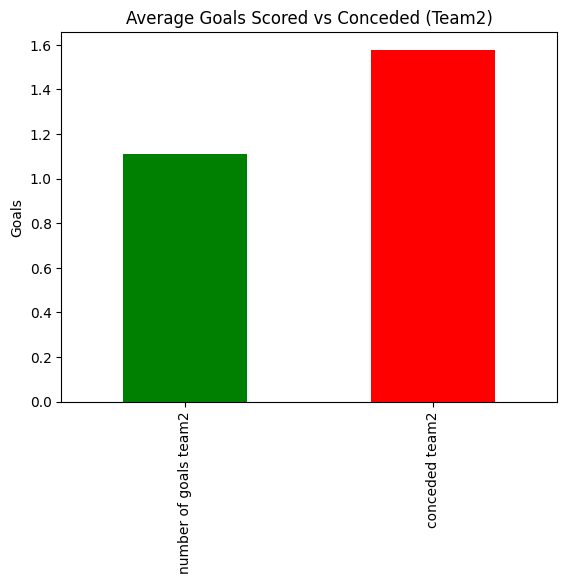

In [15]:
df[['number of goals team1','conceded team1']].mean().plot(kind='bar', color=['green','red'])
plt.title("Average Goals Scored vs Conceded (Team1)")
plt.ylabel("Goals")
plt.show()

df[['number of goals team2','conceded team2']].mean().plot(kind='bar', color=['green','red'])
plt.title("Average Goals Scored vs Conceded (Team2)")
plt.ylabel("Goals")
plt.show()

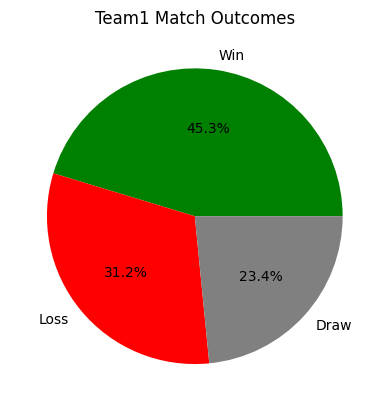

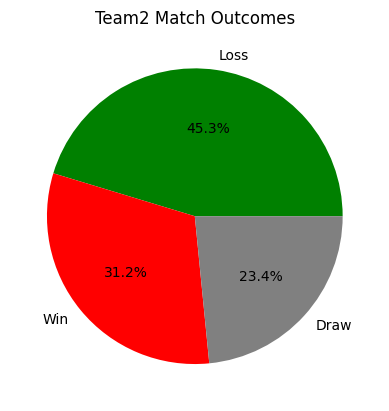

In [30]:
def match_result1(row):
    if row['number of goals team1'] > row['number of goals team2']:
        return 'Win'
    elif row['number of goals team1'] < row['number of goals team2']:
        return 'Loss'
    else:
        return 'Draw'

df['match_result_team1'] = df.apply(match_result, axis=1)
df['match_result_team1'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green','red','gray'])
plt.title("Team1 Match Outcomes")
plt.ylabel("")
plt.show()


def match_result(row):
    if row['number of goals team2'] > row['number of goals team1']:
        return 'Win'
    elif row['number of goals team2'] < row['number of goals team1']:
        return 'Loss'
    else:
        return 'Draw'

df['match_result_team2'] = df.apply(match_result, axis=1)
df['match_result_team2'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green','red','gray'])
plt.title("Team2 Match Outcomes")
plt.ylabel("")
plt.show()

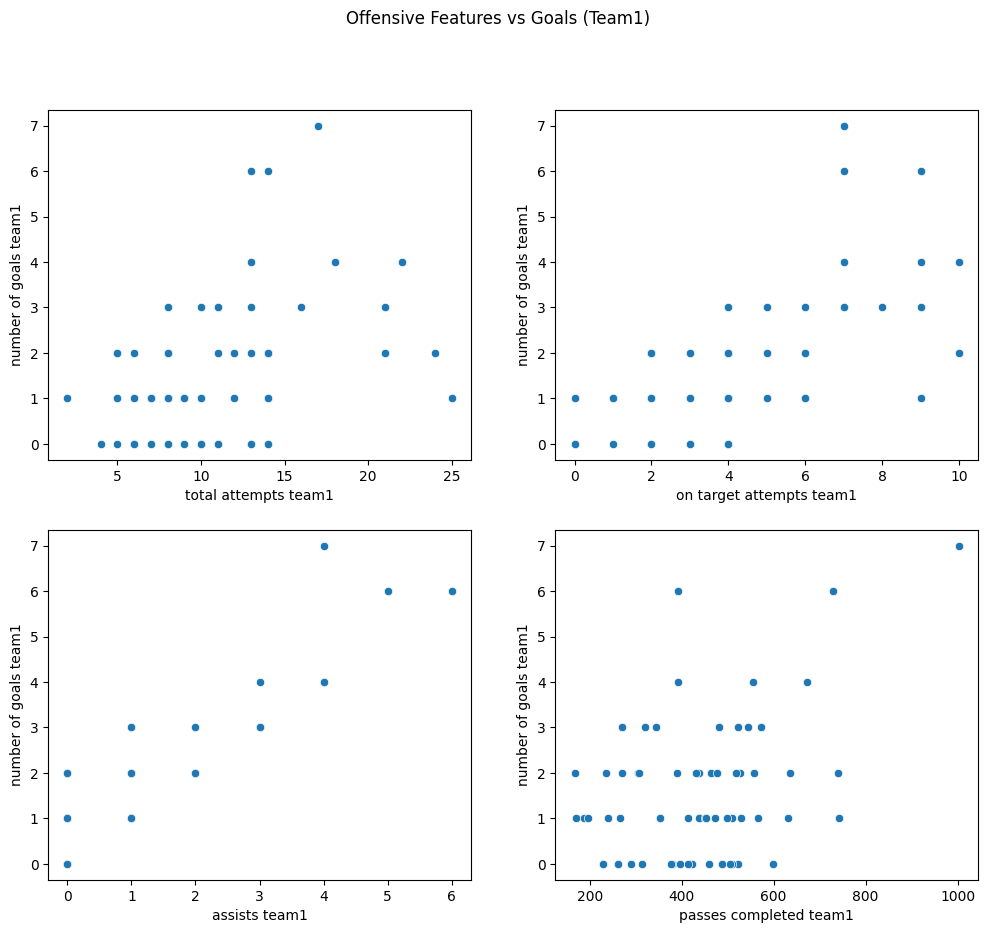

In [17]:
fig, axes = plt.subplots(2,2, figsize=(12,10))
sns.scatterplot(x='total attempts team1', y='number of goals team1', data=df, ax=axes[0,0])
sns.scatterplot(x='on target attempts team1', y='number of goals team1', data=df, ax=axes[0,1])
sns.scatterplot(x='assists team1', y='number of goals team1', data=df, ax=axes[1,0])
sns.scatterplot(x='passes completed team1', y='number of goals team1', data=df, ax=axes[1,1])
plt.suptitle("Offensive Features vs Goals (Team1)")
plt.show()

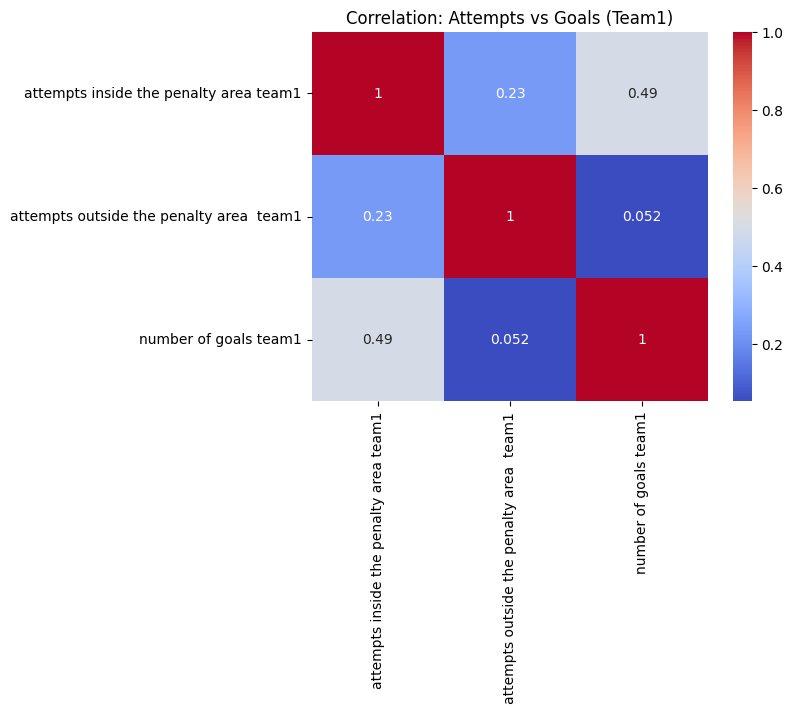

['total attempts team1', 'total attempts team2', 'on target attempts team1', 'on target attempts team2', 'off target attempts team1', 'off target attempts team2', 'attempts inside the penalty area team1', 'attempts inside the penalty area  team2', 'attempts outside the penalty area  team1', 'attempts outside the penalty area  team2']


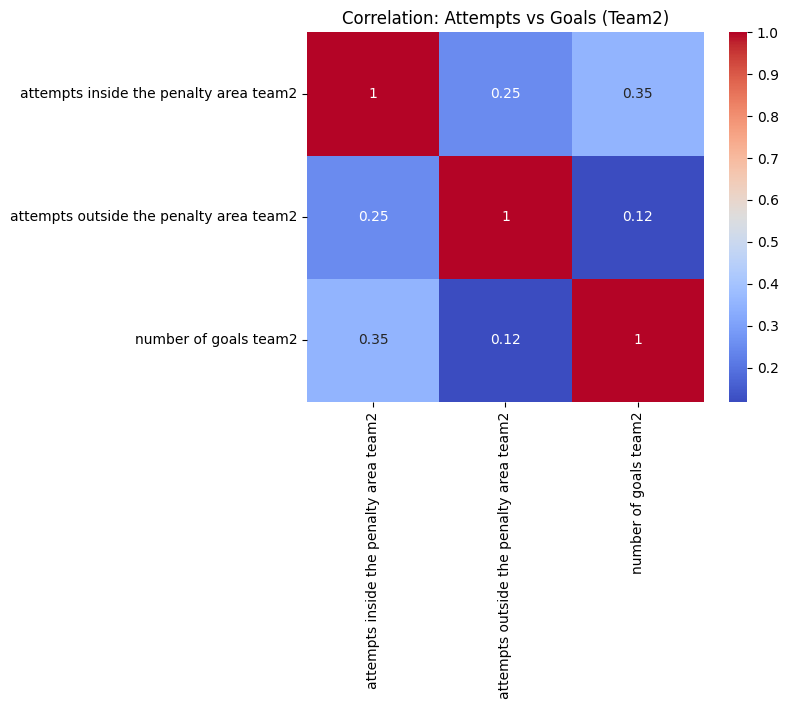

In [32]:
sns.heatmap(df[['attempts inside the penalty area team1','attempts outside the penalty area  team1',
                'number of goals team1']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation: Attempts vs Goals (Team1)")
plt.show()


print([col for col in df.columns if "attempts" in col])
# Remove double spaces
df.columns = df.columns.str.strip().str.replace("  ", " ")

sns.heatmap(df[['attempts inside the penalty area team2',
                'attempts outside the penalty area team2',
                'number of goals team2']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation: Attempts vs Goals (Team2)")
plt.show()

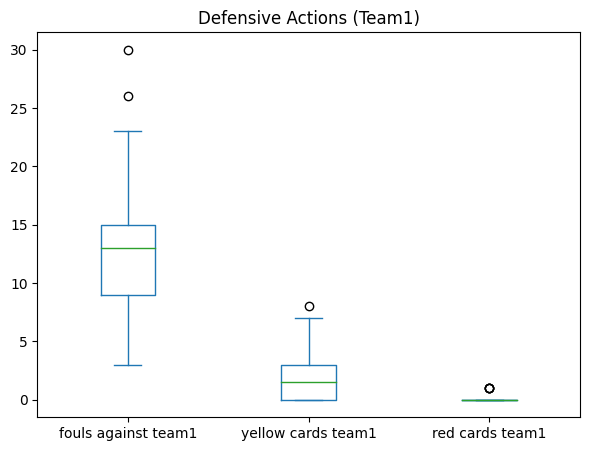

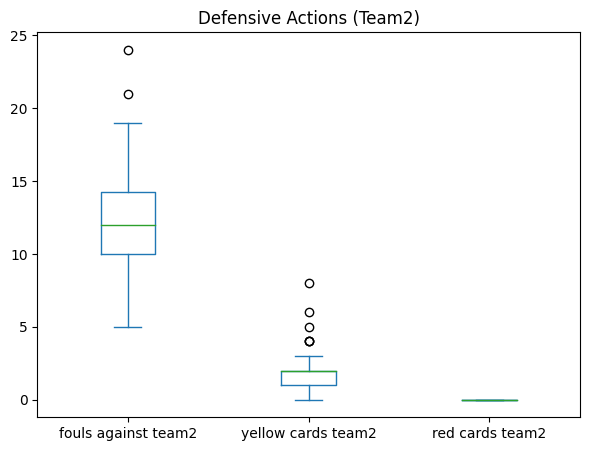

In [28]:
df[['fouls against team1','yellow cards team1','red cards team1']].plot(kind='box', figsize=(7,5))
plt.title("Defensive Actions (Team1)")
plt.show()

df[['fouls against team2','yellow cards team2','red cards team2']].plot(kind='box', figsize=(7,5))
plt.title("Defensive Actions (Team2)")
plt.show()

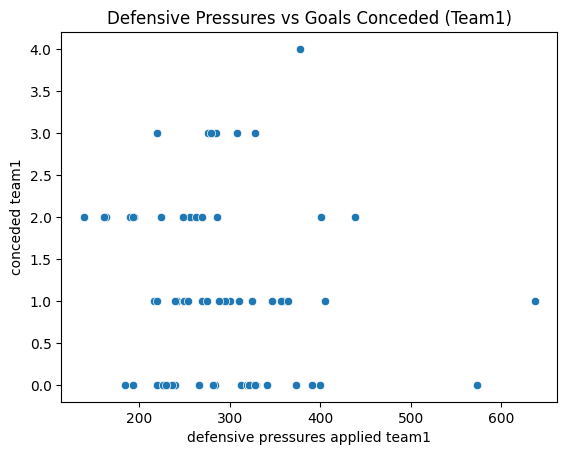

In [20]:
sns.scatterplot(x='defensive pressures applied team1', y='conceded team1', data=df)
plt.title("Defensive Pressures vs Goals Conceded (Team1)")
plt.show()

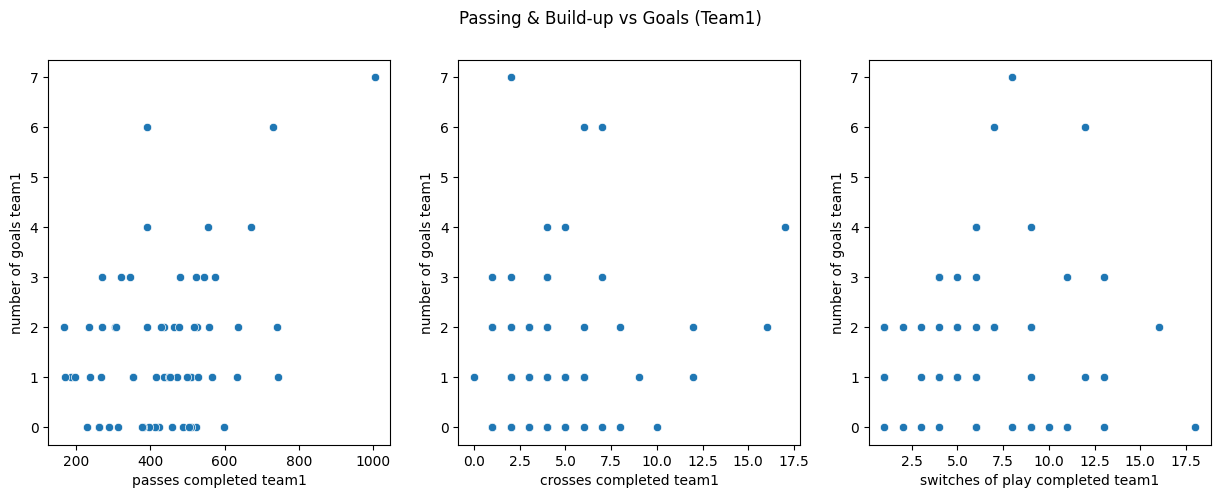

In [21]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.scatterplot(x='passes completed team1', y='number of goals team1', data=df, ax=axes[0])
sns.scatterplot(x='crosses completed team1', y='number of goals team1', data=df, ax=axes[1])
sns.scatterplot(x='switches of play completed team1', y='number of goals team1', data=df, ax=axes[2])
plt.suptitle("Passing & Build-up vs Goals (Team1)")
plt.show()

In [22]:
#wins/losses/draws for team 1
def result1(row):
    if row['number of goals team1'] > row['number of goals team2']:
        return "Win"
    elif row['number of goals team1'] < row['number of goals team2']:
        return "Loss"
    else:
        return "Draw"

df['team1_result'] = df.apply(result, axis=1)


features = ['on target attempts team1', 'total attempts team1',
            'assists team1', 'passes completed team1']
print(df.groupby('team1_result')[features].mean())

              on target attempts team1  total attempts team1  assists team1  \
team1_result                                                                  
Draw                          3.266667              9.466667       0.733333   
Loss                          3.450000             10.900000       0.300000   
Win                           5.206897             12.172414       2.000000   

              passes completed team1  
team1_result                          
Draw                      457.200000  
Loss                      406.250000  
Win                       447.758621  


In [25]:
def result2(row):
    if row['number of goals team2'] > row['number of goals team1']:
        return "Win"
    elif row['number of goals team2'] < row['number of goals team1']:
        return "Loss"
    else:
        return "Draw"

df['team2_result'] = df.apply(result, axis=1)


features = ['on target attempts team2', 'total attempts team2',
            'assists team2', 'passes completed team2']
print(df.groupby('team2_result')[features].mean())

              on target attempts team2  total attempts team2  assists team2  \
team2_result                                                                  
Draw                          3.666667             11.733333       0.533333   
Loss                          5.150000             13.000000       1.500000   
Win                           2.827586              9.862069       0.310345   

              passes completed team2  
team2_result                          
Draw                      460.000000  
Loss                      361.350000  
Win                       439.517241  


In [26]:
discipline1 = ['fouls against team1','yellow cards team1','red cards team1']
print(df.groupby('team1_result')[discipline1].mean())

discipline2 = ['fouls against team2','yellow cards team2','red cards team2']
print(df.groupby('team2_result')[discipline2].mean())

              fouls against team1  yellow cards team1  red cards team1
team1_result                                                          
Draw                    14.666667            1.866667         0.066667
Loss                    12.950000            2.300000         0.050000
Win                     11.379310            1.379310         0.068966
              fouls against team2  yellow cards team2  red cards team2
team2_result                                                          
Draw                    13.866667            1.933333              0.0
Loss                    12.600000            1.800000              0.0
Win                     11.413793            1.620690              0.0


In [27]:
zones1 = ['left channel team1','left inside channel team1',
         'central channel team1','right inside channel team1',
         'right channel team1']

print(df[zones1 + ['number of goals team1']].corr()['number of goals team1'])


zones2 = ['left channel team2','left inside channel team2',
         'central channel team2','right inside channel team2',
         'right channel team2']

print(df[zones2 + ['number of goals team2']].corr()['number of goals team2'])


left channel team1            0.120088
left inside channel team1     0.132798
central channel team1         0.070745
right inside channel team1    0.217801
right channel team1          -0.002255
number of goals team1         1.000000
Name: number of goals team1, dtype: float64
left channel team2           -0.023722
left inside channel team2     0.033093
central channel team2         0.273231
right inside channel team2    0.022877
right channel team2          -0.072537
number of goals team2         1.000000
Name: number of goals team2, dtype: float64
